In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataframe

In [3]:
#Load dataframe from day2
df = pd.read_csv('../data/interim/Data_Day2.csv')
df.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor/m2
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7.000,7.000000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3.700,7.459677
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,0.380,3.040000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,0.685,2.209677
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,0.540,5.400000


## Remove outliers

In the notebook of day 2, some outliers were identified using boxplots. I'll remove some of them now.

Consider first houses with more than 10 bathrooms

In [4]:
df[df['Banheiros'] > 10]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor/m2
852,Rua Bandeirante Sampaio Soares,Vila Morumbi,São Paulo,850,6,11,4,10.0,11.764706
1086,Avenida Piassanguaba,Planalto Paulista,São Paulo,1040,6,12,10,3.0,2.884615
1443,Rua Sílvio Portugal,Pacaembu,São Paulo,950,9,12,6,3.2,3.368421
1666,NaN,Morumbi,São Paulo,1200,6,11,6,9.5,7.916667
1753,NaN,Morumbi,São Paulo,1205,6,11,6,9.5,7.883817
1870,NaN,Jardim Guedala,São Paulo,488,4,40,4,2.6,5.327869
1955,NaN,Jardim Guedala,São Paulo,493,4,40,4,2.6,5.273834
2142,NaN,Fazenda Morumbi,São Paulo,961,4,12,9,6.5,6.763788
2144,NaN,Alto de Pinheiros,São Paulo,722,4,11,10,6.2,8.587258
2272,NaN,Retiro Morumbi,São Paulo,2100,7,14,12,19.8,9.428571


For now, I'll remove only the two that have 40 bathrooms

In [5]:
df.drop([1870, 1955], axis = 0, inplace = True)

Consider now houses with more than 20 parking spaces

In [6]:
df[df['Vagas'] > 20]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor/m2
581,Avenida das Magnólias,Cidade Jardim,São Paulo,1915,4,8,25,25.0,13.054830
594,Avenida das Magnólias,Cidade Jardim,São Paulo,1920,4,8,25,25.0,13.020833
1387,Praça Nicolau Scarpa,Jardim América,São Paulo,1200,4,4,25,65.0,54.166667
1440,Rua Araruba,Praia da Lagoa,São Paulo,600,4,5,38,7.5,12.500000
1450,Rua Desembargador Paulo Passaláqua,Pacaembu,São Paulo,826,7,7,30,8.0,9.685230
1471,NaN,Morumbi,São Paulo,419,3,4,26,2.8,6.682578
1533,NaN,Morumbi,São Paulo,424,3,4,26,2.8,6.603774
2089,NaN,Vila Cordeiro,São Paulo,1126,4,6,24,6.4,5.683837
4477,Rua Comendador Elias Zarzur,Santo Amaro,São Paulo,500,4,10,50,3.7,7.400000
4916,Rua Comendador Elias Zarzur,Santo Amaro,São Paulo,505,4,10,50,3.7,7.326733


I'll remove houses with more or equal to 30 parking spaces

In [7]:
df.drop([1440, 1450, 4477, 4916], axis = 0, inplace = True)

Consider houses with footage greater than 2000

In [8]:
df[df['Metragem'] > 2000]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor/m2
1669,"Avenida Nova Cantareira, 4337",Tucuruvi,São Paulo,2160,3,4,10,4.90,2.268519
1756,"Avenida Nova Cantareira, 4337",Tucuruvi,São Paulo,2165,3,4,10,4.90,2.263279
2272,NaN,Retiro Morumbi,São Paulo,2100,7,14,12,19.80,9.428571
4309,Rua Canuto Borelli,Vila Castelo,São Paulo,2850,3,3,10,4.00,1.403509
5971,Rua Benedito Felizardo,Sítio Represa,São Paulo,37000,4,2,4,2.90,0.078378
6240,NaN,Jardim da Glória,São Paulo,35677,3,3,4,2.55,0.071475
6264,NaN,Retiro Morumbi,São Paulo,2200,6,8,12,19.00,8.636364
6372,Rua General Pereira da Cunha,Retiro Morumbi,São Paulo,2200,6,9,15,19.80,9.000000
6411,Rua Itassuce,Pacaembu,São Paulo,2500,3,7,12,12.50,5.000000
6777,"Rua General Pereira da Cunha, 505",Retiro Morumbi,São Paulo,2200,6,6,12,19.00,8.636364


I'll remove the 3 greater

In [9]:
df.drop([5971, 6240, 9001], axis = 0, inplace = True)

**Make again the boxplots of day 2**

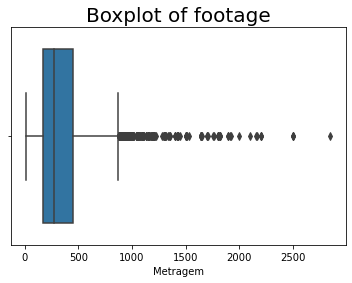

In [10]:
#Make boxplot with the footage
plt.figure()
plt.title("Boxplot of footage", fontsize = 20)
sns.boxplot(x = df['Metragem'])
plt.show()

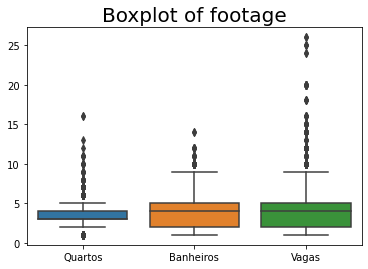

In [11]:
#Make boxplot with the number of rooms, bathrooms and parking spaces
plt.figure()
plt.title("Boxplot of footage", fontsize = 20)
sns.boxplot(data = df[['Quartos', 'Banheiros', 'Vagas']])
plt.show()

**The remaining outliers seems to be related with very expensive houses. I'll allow them for now, to include this expensive houses in the analysis.**

## Group data using more than one feature

First, I'll try to see if there is any relation between the number of rooms with the mean house price and with the mean price per square foot.

In [12]:
dfRooms = df[['Quartos','Valor', 'Valor/m2']].groupby(by = ['Quartos'])

In [13]:
dfRooms.count()

,Valor,Valor/m2
Quartos,,
1,92,92
2,1164,1164
3,3971,3971
4,2897,2897
5,737,737
6,195,195
7,49,49
8,17,17
9,8,8


There are few houses with more than 6 rooms.

In [14]:
dfRooms.mean()

,Valor,Valor/m2
Quartos,,
1,1.665980,7.946058
2,1.055149,6.389384
3,2.069930,7.526516
4,4.266508,8.997812
5,5.991313,9.249789
6,6.039369,8.458299
7,4.188347,6.463050
8,4.647647,6.955184
9,2.562500,13.247357


<AxesSubplot:xlabel='Quartos'>

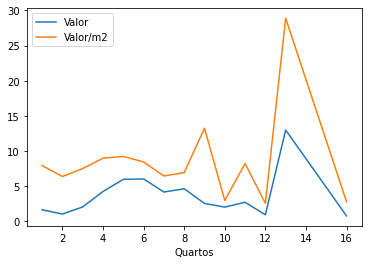

In [15]:
dfRooms.mean().plot()

I'll make the same analysis exluding rooms outliers, i.e., exluding houses that have more than 6 rooms.

In [16]:
dfRoomsCleaned  = df.loc[df['Quartos'] < 7, ['Quartos','Valor', 'Valor/m2']].groupby(by = ['Quartos'])

In [17]:
dfRoomsCleaned.mean()

,Valor,Valor/m2
Quartos,,
1,1.665980,7.946058
2,1.055149,6.389384
3,2.069930,7.526516
4,4.266508,8.997812
5,5.991313,9.249789
6,6.039369,8.458299


<AxesSubplot:xlabel='Quartos'>

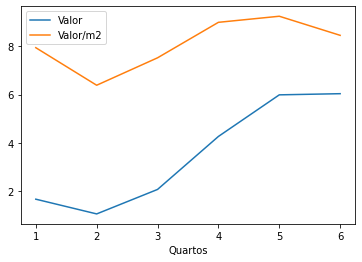

In [18]:
dfRoomsCleaned.mean().plot()

Excluding the outliers, we see a more clear correlation between price and number of rooms. The price per square foot does not seem to be cahnge much when we change the number of rooms.

**Now, I will divide the data by district and by number of rooms**

I'll not consider the rooms outliers here.

In [49]:
dfDistrictRoomsCleaned = df.loc[df['Quartos'] < 7, ['Bairro','Quartos','Valor', 'Valor/m2']].groupby(by = ['Bairro','Quartos'])

Since I cannot plot the data for all districts in a single plot in a legible way, I'll choose some districts to analyse some of them separatelly.

I'll choose 3 districts with more houses

In [69]:
df['Bairro'].value_counts()

Alto de Pinheiros    369
Jardim Guedala       350
Jardim Paulista      266
Brooklin Paulista    224
Jardim Europa        210
                    ... 
Vila América           1
Jardim Rizzo           1
Jardim Lourdes         1
Vila Nelson            1
Vila Dom Pedro II      1
Name: Bairro, Length: 696, dtype: int64

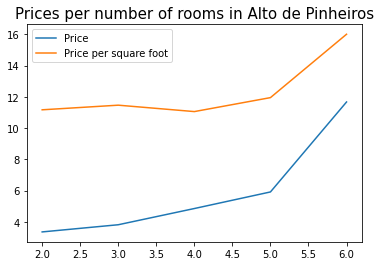

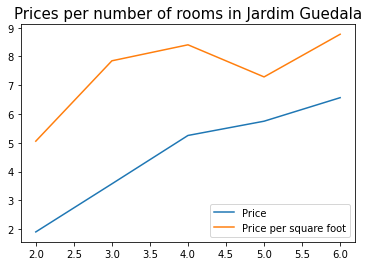

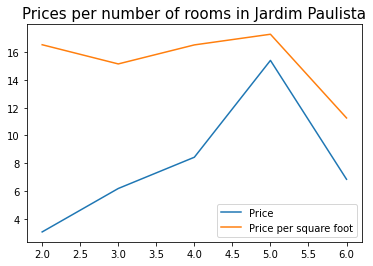

In [70]:
Districts = ['Alto de Pinheiros', 'Jardim Guedala', 'Jardim Paulista']

for District  in Districts:
    #Get allow number of rooms for District
    N_rooms = np.sort(df[(df['Bairro'] == District) & (df['Quartos'] < 7)]['Quartos'].unique())
    MeanPrice = []
    MeanPricem2 = []
    for rooms in N_rooms:
        MeanPrice.append(dfDistrictRoomsCleaned.get_group((District, rooms))['Valor'].mean())
        MeanPricem2.append(dfDistrictRoomsCleaned.get_group((District, rooms))['Valor/m2'].mean())
    plt.figure()
    plt.plot(N_rooms, MeanPrice, label = "Price")
    plt.plot(N_rooms, MeanPricem2, label = "Price per square foot")
    plt.title("Prices per number of rooms in " + District, fontsize = 15)
    plt.legend()
    plt.show()

All 3 examples show an increasing behaviour in the prices until 5 rooms (at least). The first two ('Alto de Pinheiros', 'Jardim Guedala') show that the price and the price per square foot increase as the number of rooms increases. In all 3 examples, it seems that the curves of prices and prices per square foot are correlated.

## Remove outliers again

Based on the previous analysis, it seems that the outliers can affect a lot the results. I will remove the outliers that are out of the box in the boxplots of number of rooms, bathrooms and parking spaces.

In [73]:
df.drop(df.index[df['Quartos'] > 5].tolist(), axis = 0, inplace = True)

In [74]:
df.drop(df.index[df['Banheiros'] > 10].tolist(), axis = 0, inplace = True)

In [75]:
df.drop(df.index[df['Vagas'] > 10].tolist(), axis = 0, inplace = True)

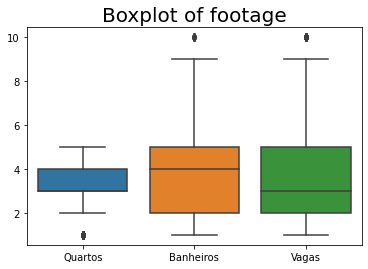

In [76]:
#make boxplots again
plt.figure()
plt.title("Boxplot of footage", fontsize = 20)
sns.boxplot(data = df[['Quartos', 'Banheiros', 'Vagas']])
plt.show()

## Save dataframe

Save dataframe with outliers removed for use in day 4

In [78]:
df.to_csv('../data/interim/Data_Day3.csv', index = False)

## Load IBGE data

In [90]:
#Load IBGE data from url
url = "https://gist.githubusercontent.com/tgcsantos/85f8c7b0a2edbc3e27fcad619b37d886/raw/a4954781e6bca9cb804062a3eea0b3b84679daf4/Basico_SP1.csv"
dfIBGE = pd.read_csv(url, sep = ';', encoding = 'utf-8', decimal = ',')

In [91]:
pd.set_option('display.max_columns', None)
dfIBGE.head()

,Cod_setor,Cod_Grandes Regi�es,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,Nome_da_RM,Cod_municipio,Nome_do_municipio,Cod_distrito,Nome_do_distrito,Cod_subdistrito,Nome_do_subdistrito,Cod_bairro,Nome_do_bairro,Situacao_setor,Tipo_setor,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012,Unnamed: 33
0,355030801000001,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,RM S�o Paulo,3550308,S�O PAULO,355030801,�GUA RASA,35503080100,�GUA RASA,3550308000,S�O PAULO (todos os setores),1,0,266.0,800.0,3.01,2.32,2091.32,8532451.78,2164.55,8673276.78,1227.41,4285771.99,1713.75,5152087.86,NaN
1,355030801000002,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,RM S�o Paulo,3550308,S�O PAULO,355030801,�GUA RASA,35503080100,�GUA RASA,3550308000,S�O PAULO (todos os setores),1,0,306.0,913.0,2.98,2.09,1650.09,3983441.31,1717.44,4030519.99,1045.78,2572133.32,1468.08,2991546.94,NaN
2,355030801000003,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,RM S�o Paulo,3550308,S�O PAULO,355030801,�GUA RASA,35503080100,�GUA RASA,3550308000,S�O PAULO (todos os setores),1,0,189.0,625.0,3.31,3.08,1280.43,5474593.06,2349.53,7553913.02,902.97,2735492.52,1786.79,3837674.74,NaN
3,355030801000004,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,RM S�o Paulo,3550308,S�O PAULO,355030801,�GUA RASA,35503080100,�GUA RASA,3550308000,S�O PAULO (todos os setores),1,0,181.0,572.0,3.16,2.26,1119.59,3572955.10,1859.13,4567289.50,869.09,2122409.02,1567.41,2735383.24,NaN
4,355030801000005,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,RM S�o Paulo,3550308,S�O PAULO,355030801,�GUA RASA,35503080100,�GUA RASA,3550308000,S�O PAULO (todos os setores),1,0,240.0,754.0,3.14,2.35,1416.90,2240207.58,1581.66,2240109.39,917.71,1570047.75,1356.35,1725877.85,NaN


In [92]:
#Delete the last column (there is an additional separator ; in the header in the csv)
dfIBGE.drop(columns = ['Unnamed: 33'], inplace = True)

In [93]:
#columns names
dfIBGE.columns

Index(['Cod_setor', 'Cod_Grandes Regi�es', 'Nome_Grande_Regiao', 'Cod_UF',
       'Nome_da_UF ', 'Cod_meso', 'Nome_da_meso', 'Cod_micro', 'Nome_da_micro',
       'Cod_RM', 'Nome_da_RM', 'Cod_municipio', 'Nome_do_municipio',
       'Cod_distrito', 'Nome_do_distrito', 'Cod_subdistrito',
       'Nome_do_subdistrito', 'Cod_bairro', 'Nome_do_bairro', 'Situacao_setor',
       'Tipo_setor', 'V001', 'V002', 'V003', 'V004', 'V005', 'V006', 'V007',
       'V008', 'V009', 'V010', 'V011', 'V012'],
      dtype='object')

**There is an extra space in the name of one coluumn: 'Nome_da_UF '**

In [94]:
#Remove this extra space
dfIBGE.rename(columns = {'Nome_da_UF ':'Nome_da_UF'}, inplace = True)

**There are encoding errors in the original file. Replace them by the right value**

I'll replace by values without accents.

In [95]:
dfIBGE.rename(columns = {'Cod_Grandes Regi�es':'Cod_Grandes Regioes'}, inplace = True)
dfIBGE.head()

,Cod_setor,Cod_Grandes Regioes,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,Nome_da_RM,Cod_municipio,Nome_do_municipio,Cod_distrito,Nome_do_distrito,Cod_subdistrito,Nome_do_subdistrito,Cod_bairro,Nome_do_bairro,Situacao_setor,Tipo_setor,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,355030801000001,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,RM S�o Paulo,3550308,S�O PAULO,355030801,�GUA RASA,35503080100,�GUA RASA,3550308000,S�O PAULO (todos os setores),1,0,266.0,800.0,3.01,2.32,2091.32,8532451.78,2164.55,8673276.78,1227.41,4285771.99,1713.75,5152087.86
1,355030801000002,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,RM S�o Paulo,3550308,S�O PAULO,355030801,�GUA RASA,35503080100,�GUA RASA,3550308000,S�O PAULO (todos os setores),1,0,306.0,913.0,2.98,2.09,1650.09,3983441.31,1717.44,4030519.99,1045.78,2572133.32,1468.08,2991546.94
2,355030801000003,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,RM S�o Paulo,3550308,S�O PAULO,355030801,�GUA RASA,35503080100,�GUA RASA,3550308000,S�O PAULO (todos os setores),1,0,189.0,625.0,3.31,3.08,1280.43,5474593.06,2349.53,7553913.02,902.97,2735492.52,1786.79,3837674.74
3,355030801000004,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,RM S�o Paulo,3550308,S�O PAULO,355030801,�GUA RASA,35503080100,�GUA RASA,3550308000,S�O PAULO (todos os setores),1,0,181.0,572.0,3.16,2.26,1119.59,3572955.10,1859.13,4567289.50,869.09,2122409.02,1567.41,2735383.24
4,355030801000005,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,RM S�o Paulo,3550308,S�O PAULO,355030801,�GUA RASA,35503080100,�GUA RASA,3550308000,S�O PAULO (todos os setores),1,0,240.0,754.0,3.14,2.35,1416.90,2240207.58,1581.66,2240109.39,917.71,1570047.75,1356.35,1725877.85


In [96]:
#Verify values in 'Nome_Grande_Regiao'
dfIBGE['Nome_Grande_Regiao'].unique()

array(['Regi�o Sudeste'], dtype=object)

In [97]:
dfIBGE.loc[dfIBGE['Nome_Grande_Regiao'] == 'Regi�o Sudeste', 'Nome_Grande_Regiao'] = 'Regiao Sudeste'

In [98]:
dfIBGE['Nome_Grande_Regiao'].unique()

array(['Regiao Sudeste'], dtype=object)

In [99]:
#Verify values in 'Nome_da_UF'
dfIBGE['Nome_da_UF'].unique()

array(['S�o Paulo'], dtype=object)

In [100]:
#Replace by the right value
dfIBGE.loc[dfIBGE['Nome_da_UF'] == 'S�o Paulo', 'Nome_da_UF'] = 'Sao Paulo'

In [101]:
#Verify values in 'Nome_da_meso'
dfIBGE['Nome_da_meso'].unique()

array(['Metropolitana de S�o Paulo'], dtype=object)

In [102]:
#Replace by the right value
dfIBGE.loc[dfIBGE['Nome_da_meso'] == 'Metropolitana de S�o Paulo', 'Nome_da_meso'] = 'Metropolitana de Sao Paulo'

In [103]:
#Verify values in 'Nome_da_micro'
dfIBGE['Nome_da_micro'].unique()

array(['S�o Paulo'], dtype=object)

In [104]:
#Replace by the right value
dfIBGE.loc[dfIBGE['Nome_da_micro'] == 'S�o Paulo', 'Nome_da_micro'] = 'Sao Paulo'

In [105]:
#Replace 'S�o Paulo' by 'Sao Paulo' in all columns remaining
dfIBGE.replace("S�o Paulo", "Sao Paulo", inplace = True, regex = True)

In [106]:
dfIBGE.head()

,Cod_setor,Cod_Grandes Regioes,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,Nome_da_RM,Cod_municipio,Nome_do_municipio,Cod_distrito,Nome_do_distrito,Cod_subdistrito,Nome_do_subdistrito,Cod_bairro,Nome_do_bairro,Situacao_setor,Tipo_setor,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,355030801000001,3,Regiao Sudeste,35,Sao Paulo,3515,Metropolitana de Sao Paulo,35061,Sao Paulo,20,RM Sao Paulo,3550308,S�O PAULO,355030801,�GUA RASA,35503080100,�GUA RASA,3550308000,S�O PAULO (todos os setores),1,0,266.0,800.0,3.01,2.32,2091.32,8532451.78,2164.55,8673276.78,1227.41,4285771.99,1713.75,5152087.86
1,355030801000002,3,Regiao Sudeste,35,Sao Paulo,3515,Metropolitana de Sao Paulo,35061,Sao Paulo,20,RM Sao Paulo,3550308,S�O PAULO,355030801,�GUA RASA,35503080100,�GUA RASA,3550308000,S�O PAULO (todos os setores),1,0,306.0,913.0,2.98,2.09,1650.09,3983441.31,1717.44,4030519.99,1045.78,2572133.32,1468.08,2991546.94
2,355030801000003,3,Regiao Sudeste,35,Sao Paulo,3515,Metropolitana de Sao Paulo,35061,Sao Paulo,20,RM Sao Paulo,3550308,S�O PAULO,355030801,�GUA RASA,35503080100,�GUA RASA,3550308000,S�O PAULO (todos os setores),1,0,189.0,625.0,3.31,3.08,1280.43,5474593.06,2349.53,7553913.02,902.97,2735492.52,1786.79,3837674.74
3,355030801000004,3,Regiao Sudeste,35,Sao Paulo,3515,Metropolitana de Sao Paulo,35061,Sao Paulo,20,RM Sao Paulo,3550308,S�O PAULO,355030801,�GUA RASA,35503080100,�GUA RASA,3550308000,S�O PAULO (todos os setores),1,0,181.0,572.0,3.16,2.26,1119.59,3572955.10,1859.13,4567289.50,869.09,2122409.02,1567.41,2735383.24
4,355030801000005,3,Regiao Sudeste,35,Sao Paulo,3515,Metropolitana de Sao Paulo,35061,Sao Paulo,20,RM Sao Paulo,3550308,S�O PAULO,355030801,�GUA RASA,35503080100,�GUA RASA,3550308000,S�O PAULO (todos os setores),1,0,240.0,754.0,3.14,2.35,1416.90,2240207.58,1581.66,2240109.39,917.71,1570047.75,1356.35,1725877.85


In [107]:
#Replace 'S�O PAULO' by 'SAO PAULO' in all columns remaining
dfIBGE.replace("S�O PAULO", "SAO PAULO", inplace = True, regex = True)

In [108]:
dfIBGE.head()

,Cod_setor,Cod_Grandes Regioes,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,Nome_da_RM,Cod_municipio,Nome_do_municipio,Cod_distrito,Nome_do_distrito,Cod_subdistrito,Nome_do_subdistrito,Cod_bairro,Nome_do_bairro,Situacao_setor,Tipo_setor,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,355030801000001,3,Regiao Sudeste,35,Sao Paulo,3515,Metropolitana de Sao Paulo,35061,Sao Paulo,20,RM Sao Paulo,3550308,SAO PAULO,355030801,�GUA RASA,35503080100,�GUA RASA,3550308000,SAO PAULO (todos os setores),1,0,266.0,800.0,3.01,2.32,2091.32,8532451.78,2164.55,8673276.78,1227.41,4285771.99,1713.75,5152087.86
1,355030801000002,3,Regiao Sudeste,35,Sao Paulo,3515,Metropolitana de Sao Paulo,35061,Sao Paulo,20,RM Sao Paulo,3550308,SAO PAULO,355030801,�GUA RASA,35503080100,�GUA RASA,3550308000,SAO PAULO (todos os setores),1,0,306.0,913.0,2.98,2.09,1650.09,3983441.31,1717.44,4030519.99,1045.78,2572133.32,1468.08,2991546.94
2,355030801000003,3,Regiao Sudeste,35,Sao Paulo,3515,Metropolitana de Sao Paulo,35061,Sao Paulo,20,RM Sao Paulo,3550308,SAO PAULO,355030801,�GUA RASA,35503080100,�GUA RASA,3550308000,SAO PAULO (todos os setores),1,0,189.0,625.0,3.31,3.08,1280.43,5474593.06,2349.53,7553913.02,902.97,2735492.52,1786.79,3837674.74
3,355030801000004,3,Regiao Sudeste,35,Sao Paulo,3515,Metropolitana de Sao Paulo,35061,Sao Paulo,20,RM Sao Paulo,3550308,SAO PAULO,355030801,�GUA RASA,35503080100,�GUA RASA,3550308000,SAO PAULO (todos os setores),1,0,181.0,572.0,3.16,2.26,1119.59,3572955.10,1859.13,4567289.50,869.09,2122409.02,1567.41,2735383.24
4,355030801000005,3,Regiao Sudeste,35,Sao Paulo,3515,Metropolitana de Sao Paulo,35061,Sao Paulo,20,RM Sao Paulo,3550308,SAO PAULO,355030801,�GUA RASA,35503080100,�GUA RASA,3550308000,SAO PAULO (todos os setores),1,0,240.0,754.0,3.14,2.35,1416.90,2240207.58,1581.66,2240109.39,917.71,1570047.75,1356.35,1725877.85


In [109]:
#Verify values in 'Nome_do_distrito'
dfIBGE['Nome_do_distrito'].unique()

array(['�GUA RASA', 'ALTO DE PINHEIROS', 'ANHANGUERA', 'ARICANDUVA',
       'ARTUR ALVIM', 'BARRA FUNDA', 'BELA VISTA', 'BEL�M', 'BOM RETIRO',
       'BR�S', 'BRASIL�NDIA', 'BUTANT�', 'CACHOEIRINHA', 'CAMBUCI',
       'CAMPO BELO', 'CAMPO GRANDE', 'CAMPO LIMPO', 'CANGAIBA',
       'CAP�O REDONDO', 'CARR�O', 'CASA VERDE', 'CIDADE ADEMAR',
       'CIDADE DUTRA', 'CIDADE LIDER', 'CIDADE TIRADENTES', 'CONSOLA��O',
       'CURSINO', 'ERMELINO MATARAZZO', 'FREGUESIA DO �', 'GRAJA�',
       'GUAIANASES', 'MOEMA', 'IGUATEMI', 'IPIRANGA', 'ITAIM BIBI',
       'ITAIM PAULISTA', 'ITAQUERA', 'JABAQUARA', 'JA�AN�', 'JAGUARA',
       'JAGUAR�', 'JARAGU�', 'JARDIM �NGELA', 'JARDIM HELENA',
       'JARDIM PAULISTA', 'JARDIM S�O LU�S', 'JOS� BONIF�CIO', 'LAPA',
       'LIBERDADE', 'LIM�O', 'MANDAQUI', 'MARSILAC', 'MOOCA', 'MORUMBI',
       'PARELHEIROS', 'PARI', 'PARQUE DO CARMO', 'PEDREIRA', 'PENHA',
       'PERDIZES', 'PERUS', 'PINHEIROS', 'PIRITUBA', 'PONTE RASA',
       'RAPOSO TAVARES', 'REP�BLICA

In [110]:
#Create dictionary to make replace
replace_dict = {'�GUA RASA':'AGUA RASA', 'BEL�M':'BELEM', 'BR�S':'BRAS', 'BRASIL�NDIA':'BRASILANDIA', 'BUTANT�':'BATANTA', 'CAP�O REDONDO':'CAPAO REDONDO', 'CARR�O':'CARRAO', 'CONSOLA��O':'CONSOLACAO',
              'FREGUESIA DO �':'FREGUESIA DO O', 'GRAJA�':'GRAJAU', 'JA�AN�':'JACANA', 'JAGUAR�':'JAGUARE', 'JARAGU�':'JARAGUA', 'JARDIM �NGELA':'JARDIM ANGELA', 'JARDIM S�O LU�S':'JARDIM SAO LUIS',
             'JOS� BONIF�CIO':'JOSE BONIFACIO', 'LIM�O':'LIMAO', 'REP�BLICA':'REPUBLICA', 'SACOM�':'SACOMA', 'SANTA CEC�LIA':'SANTA CECILIA', 'S�O LUCAS':'SAO LUCAS', 'S�O MATEUS':'SAO MATEUS', 'S�O MIGUEL':'SAO MIGUEL',
             'S�O RAFAEL':'SAO RAFAEL', 'SA�DE':'SAUDE', 'S�':'SE', 'TATUAP�':'TATUAPE', 'TREMEMB�':'TREMEMBE', 'VILA CURU��':'VILA CURUCA', 'VILA JACU�':'VILA JACUI', 'VILA S�NIA':'VILA SONIA', 'S�O DOMINGOS':'SAO DOMINGOS'}
dfIBGE.replace(replace_dict, inplace = True)

In [111]:
#Verify values in 'Nome_do_distrito'
dfIBGE['Nome_do_distrito'].unique()

array(['AGUA RASA', 'ALTO DE PINHEIROS', 'ANHANGUERA', 'ARICANDUVA',
       'ARTUR ALVIM', 'BARRA FUNDA', 'BELA VISTA', 'BELEM', 'BOM RETIRO',
       'BRAS', 'BRASILANDIA', 'BATANTA', 'CACHOEIRINHA', 'CAMBUCI',
       'CAMPO BELO', 'CAMPO GRANDE', 'CAMPO LIMPO', 'CANGAIBA',
       'CAPAO REDONDO', 'CARRAO', 'CASA VERDE', 'CIDADE ADEMAR',
       'CIDADE DUTRA', 'CIDADE LIDER', 'CIDADE TIRADENTES', 'CONSOLACAO',
       'CURSINO', 'ERMELINO MATARAZZO', 'FREGUESIA DO O', 'GRAJAU',
       'GUAIANASES', 'MOEMA', 'IGUATEMI', 'IPIRANGA', 'ITAIM BIBI',
       'ITAIM PAULISTA', 'ITAQUERA', 'JABAQUARA', 'JACANA', 'JAGUARA',
       'JAGUARE', 'JARAGUA', 'JARDIM ANGELA', 'JARDIM HELENA',
       'JARDIM PAULISTA', 'JARDIM SAO LUIS', 'JOSE BONIFACIO', 'LAPA',
       'LIBERDADE', 'LIMAO', 'MANDAQUI', 'MARSILAC', 'MOOCA', 'MORUMBI',
       'PARELHEIROS', 'PARI', 'PARQUE DO CARMO', 'PEDREIRA', 'PENHA',
       'PERDIZES', 'PERUS', 'PINHEIROS', 'PIRITUBA', 'PONTE RASA',
       'RAPOSO TAVARES', 'REPUBLICA

In [112]:
#Verify values in 'Nome_do_subdistrito'
dfIBGE['Nome_do_subdistrito'].unique()

array(['AGUA RASA', 'ALTO DE PINHEIROS', 'ANHANGUERA', 'ARICANDUVA',
       'ARTUR ALVIM', 'BARRA FUNDA', 'BELA VISTA', 'BELEM', 'BOM RETIRO',
       'BRAS', 'BRASILANDIA', 'BATANTA', 'CACHOEIRINHA', 'CAMBUCI',
       'CAMPO BELO', 'CAMPO GRANDE', 'CAMPO LIMPO', 'CANGAIBA',
       'CAPAO REDONDO', 'CARRAO', 'CASA VERDE', 'CIDADE ADEMAR',
       'CIDADE DUTRA', 'CIDADE LIDER', 'CIDADE TIRADENTES', 'CONSOLACAO',
       'CURSINO', 'ERMELINO MATARAZZO', 'FREGUESIA DO O', 'GRAJAU',
       'GUAIANASES', 'MOEMA', 'IGUATEMI', 'IPIRANGA', 'ITAIM BIBI',
       'ITAIM PAULISTA', 'ITAQUERA', 'JABAQUARA', 'JACANA', 'JAGUARA',
       'JAGUARE', 'JARAGUA', 'JARDIM ANGELA', 'JARDIM HELENA',
       'JARDIM PAULISTA', 'JARDIM SAO LUIS', 'JOSE BONIFACIO', 'LAPA',
       'LIBERDADE', 'LIMAO', 'MANDAQUI', 'MARSILAC', 'MOOCA', 'MORUMBI',
       'PARELHEIROS', 'PARI', 'PARQUE DO CARMO', 'PEDREIRA', 'PENHA',
       'PERDIZES', 'PERUS', 'PINHEIROS', 'PIRITUBA', 'PONTE RASA',
       'RAPOSO TAVARES', 'REPUBLICA

In [113]:
dfIBGE.head()

,Cod_setor,Cod_Grandes Regioes,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,Nome_da_RM,Cod_municipio,Nome_do_municipio,Cod_distrito,Nome_do_distrito,Cod_subdistrito,Nome_do_subdistrito,Cod_bairro,Nome_do_bairro,Situacao_setor,Tipo_setor,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,355030801000001,3,Regiao Sudeste,35,Sao Paulo,3515,Metropolitana de Sao Paulo,35061,Sao Paulo,20,RM Sao Paulo,3550308,SAO PAULO,355030801,AGUA RASA,35503080100,AGUA RASA,3550308000,SAO PAULO (todos os setores),1,0,266.0,800.0,3.01,2.32,2091.32,8532451.78,2164.55,8673276.78,1227.41,4285771.99,1713.75,5152087.86
1,355030801000002,3,Regiao Sudeste,35,Sao Paulo,3515,Metropolitana de Sao Paulo,35061,Sao Paulo,20,RM Sao Paulo,3550308,SAO PAULO,355030801,AGUA RASA,35503080100,AGUA RASA,3550308000,SAO PAULO (todos os setores),1,0,306.0,913.0,2.98,2.09,1650.09,3983441.31,1717.44,4030519.99,1045.78,2572133.32,1468.08,2991546.94
2,355030801000003,3,Regiao Sudeste,35,Sao Paulo,3515,Metropolitana de Sao Paulo,35061,Sao Paulo,20,RM Sao Paulo,3550308,SAO PAULO,355030801,AGUA RASA,35503080100,AGUA RASA,3550308000,SAO PAULO (todos os setores),1,0,189.0,625.0,3.31,3.08,1280.43,5474593.06,2349.53,7553913.02,902.97,2735492.52,1786.79,3837674.74
3,355030801000004,3,Regiao Sudeste,35,Sao Paulo,3515,Metropolitana de Sao Paulo,35061,Sao Paulo,20,RM Sao Paulo,3550308,SAO PAULO,355030801,AGUA RASA,35503080100,AGUA RASA,3550308000,SAO PAULO (todos os setores),1,0,181.0,572.0,3.16,2.26,1119.59,3572955.10,1859.13,4567289.50,869.09,2122409.02,1567.41,2735383.24
4,355030801000005,3,Regiao Sudeste,35,Sao Paulo,3515,Metropolitana de Sao Paulo,35061,Sao Paulo,20,RM Sao Paulo,3550308,SAO PAULO,355030801,AGUA RASA,35503080100,AGUA RASA,3550308000,SAO PAULO (todos os setores),1,0,240.0,754.0,3.14,2.35,1416.90,2240207.58,1581.66,2240109.39,917.71,1570047.75,1356.35,1725877.85


In [114]:
#Verify data types
dfIBGE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18363 entries, 0 to 18362
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cod_setor            18363 non-null  int64  
 1   Cod_Grandes Regioes  18363 non-null  int64  
 2   Nome_Grande_Regiao   18363 non-null  object 
 3   Cod_UF               18363 non-null  int64  
 4   Nome_da_UF           18363 non-null  object 
 5   Cod_meso             18363 non-null  int64  
 6   Nome_da_meso         18363 non-null  object 
 7   Cod_micro            18363 non-null  int64  
 8   Nome_da_micro        18363 non-null  object 
 9   Cod_RM               18363 non-null  int64  
 10  Nome_da_RM           18363 non-null  object 
 11  Cod_municipio        18363 non-null  int64  
 12  Nome_do_municipio    18363 non-null  object 
 13  Cod_distrito         18363 non-null  int64  
 14  Nome_do_distrito     18363 non-null  object 
 15  Cod_subdistrito      18363 non-null 

It seems that everything that should have a numeric type has a numeric type.

In [115]:
#Verify null values
dfIBGE.isnull().sum()

Cod_setor               0
Cod_Grandes Regioes     0
Nome_Grande_Regiao      0
Cod_UF                  0
Nome_da_UF              0
Cod_meso                0
Nome_da_meso            0
Cod_micro               0
Nome_da_micro           0
Cod_RM                  0
Nome_da_RM              0
Cod_municipio           0
Nome_do_municipio       0
Cod_distrito            0
Nome_do_distrito        0
Cod_subdistrito         0
Nome_do_subdistrito     0
Cod_bairro              0
Nome_do_bairro          0
Situacao_setor          0
Tipo_setor              0
V001                   30
V002                   30
V003                   30
V004                   30
V005                   30
V006                   30
V007                   39
V008                   39
V009                    0
V010                    0
V011                   11
V012                   11
dtype: int64

I'll allow this null valuees for now.

**Drop columns that have only one value, they won't be useful**

In [116]:
dfIBGE.drop(columns = ['Cod_Grandes Regioes', 'Nome_Grande_Regiao', 'Cod_UF', 'Nome_da_UF', 'Cod_meso', 'Nome_da_meso', 'Cod_micro', 'Nome_da_micro', 'Cod_RM', 'Nome_da_RM', 'Cod_municipio', 'Nome_do_municipio', 'Cod_bairro', 'Nome_do_bairro'], inplace = True)

In [117]:
#sample rows to see if some error appears
dfIBGE.sample(10)

,Cod_setor,Cod_distrito,Nome_do_distrito,Cod_subdistrito,Nome_do_subdistrito,Situacao_setor,Tipo_setor,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
11116,355030858000246,355030858,PEDREIRA,35503085800,PEDREIRA,1,0,20.0,58.0,2.90,2.52,903.00,5.459589e+05,1204.00,3.526543e+05,595.47,5.329099e+05,1088.28,4.342291e+05
5306,355030830000205,355030830,GRAJAU,35503083000,GRAJAU,1,0,259.0,867.0,3.35,2.38,983.77,3.978490e+05,1044.25,3.589937e+05,618.68,3.712103e+05,897.02,2.883751e+05
646,355030807000027,355030807,BELA VISTA,35503080700,BELA VISTA,1,0,283.0,591.0,2.09,1.20,5706.10,3.681342e+07,6210.87,3.693540e+07,4476.65,2.762618e+07,5387.48,2.834153e+07
17417,355030892000064,355030892,VILA MEDEIROS,35503089200,VILA MEDEIROS,1,0,299.0,955.0,3.19,2.30,1343.47,2.803802e+06,1613.24,2.932119e+06,983.82,1.785811e+06,1447.89,1.956552e+06
5557,355030830000469,355030830,GRAJAU,35503083000,GRAJAU,2,0,90.0,287.0,3.19,2.00,975.78,2.521738e+06,1125.90,2.743522e+06,575.18,1.172407e+06,1010.56,1.623010e+06
15281,355030880000081,355030880,TATUAPE,35503088000,TATUAPE,1,0,142.0,419.0,2.95,1.66,3798.25,1.602393e+07,4181.02,1.603849e+07,2235.49,1.153861e+07,3274.28,1.350642e+07
12143,355030864000035,355030864,PONTE RASA,35503086400,PONTE RASA,1,0,205.0,661.0,3.22,2.46,1163.16,1.084803e+06,1275.12,1.046251e+06,767.27,9.072347e+05,1124.93,9.278500e+05
13352,355030869000124,355030869,SANTA CECILIA,35503086900,SANTA CECILIA,1,0,294.0,856.0,2.91,2.22,10064.35,1.830504e+08,10382.18,1.855400e+08,5338.36,1.082256e+08,7574.17,1.366706e+08
9358,355030846000321,355030846,JARDIM SAO LUIS,35503084600,JARDIM SAO LUIS,1,1,268.0,966.0,3.60,3.18,678.25,1.272340e+05,818.78,3.812657e+04,477.53,1.620056e+05,777.75,3.008125e+04
4294,355030825000257,355030825,CIDADE TIRADENTES,35503082500,CIDADE TIRADENTES,2,0,129.0,499.0,3.87,3.97,823.03,8.463281e+05,1378.84,6.489310e+05,474.30,5.273690e+05,1199.71,4.632432e+05


## Save dataframe

In [119]:
dfIBGE.to_csv('../data/interim/IBGE_cleaned.csv', index = False)

## Test encoding ISO-8859-1

In [120]:
#Load IBGE data from url
url = "https://gist.githubusercontent.com/tgcsantos/85f8c7b0a2edbc3e27fcad619b37d886/raw/a4954781e6bca9cb804062a3eea0b3b84679daf4/Basico_SP1.csv"
dfIBGE2 = pd.read_csv(url, sep = ';', encoding = 'ISO-8859-1', decimal = ',')
dfIBGE2.head()

,Cod_setor,Cod_Grandes Regiï¿½es,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,Nome_da_RM,Cod_municipio,Nome_do_municipio,Cod_distrito,Nome_do_distrito,Cod_subdistrito,Nome_do_subdistrito,Cod_bairro,Nome_do_bairro,Situacao_setor,Tipo_setor,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012,Unnamed: 33
0,355030801000001,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,RM Sï¿½o Paulo,3550308,Sï¿½O PAULO,355030801,ï¿½GUA RASA,35503080100,ï¿½GUA RASA,3550308000,Sï¿½O PAULO (todos os setores),1,0,266.0,800.0,3.01,2.32,2091.32,8532451.78,2164.55,8673276.78,1227.41,4285771.99,1713.75,5152087.86,NaN
1,355030801000002,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,RM Sï¿½o Paulo,3550308,Sï¿½O PAULO,355030801,ï¿½GUA RASA,35503080100,ï¿½GUA RASA,3550308000,Sï¿½O PAULO (todos os setores),1,0,306.0,913.0,2.98,2.09,1650.09,3983441.31,1717.44,4030519.99,1045.78,2572133.32,1468.08,2991546.94,NaN
2,355030801000003,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,RM Sï¿½o Paulo,3550308,Sï¿½O PAULO,355030801,ï¿½GUA RASA,35503080100,ï¿½GUA RASA,3550308000,Sï¿½O PAULO (todos os setores),1,0,189.0,625.0,3.31,3.08,1280.43,5474593.06,2349.53,7553913.02,902.97,2735492.52,1786.79,3837674.74,NaN
3,355030801000004,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,RM Sï¿½o Paulo,3550308,Sï¿½O PAULO,355030801,ï¿½GUA RASA,35503080100,ï¿½GUA RASA,3550308000,Sï¿½O PAULO (todos os setores),1,0,181.0,572.0,3.16,2.26,1119.59,3572955.10,1859.13,4567289.50,869.09,2122409.02,1567.41,2735383.24,NaN
4,355030801000005,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,RM Sï¿½o Paulo,3550308,Sï¿½O PAULO,355030801,ï¿½GUA RASA,35503080100,ï¿½GUA RASA,3550308000,Sï¿½O PAULO (todos os setores),1,0,240.0,754.0,3.14,2.35,1416.90,2240207.58,1581.66,2240109.39,917.71,1570047.75,1356.35,1725877.85,NaN


It have not solved the problems with accents